# 第一题

In [68]:
import pandas as pd
from datetime import datetime
import warnings 
import talib as ta
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [44]:
orderedDict = pd.read_excel('sz50.xlsx', sheetname=None, index_col='datetime')
data = dict(orderedDict)
data['600000.XSHG'].head()

,close,high,low,open,volume
datetime,,,,,
2017-01-03 15:00:00,115.99,117.06,115.14,115.43,16232125
2017-01-04 15:00:00,116.28,116.42,115.21,115.99,29656234
2017-01-05 15:00:00,116.07,116.64,115.64,116.07,26436646
2017-01-06 15:00:00,115.21,116.07,114.86,116.07,17195598
2017-01-09 15:00:00,115.35,115.99,114.86,115.64,14908745


In [45]:
PN = pd.Panel(data)
print(PN)

<class 'pandas.core.panel.Panel'>
Dimensions: 50 (items) x 215 (major_axis) x 5 (minor_axis)
Items axis: 600000.XSHG to 601989.XSHG
Major_axis axis: 2017-01-03 15:00:00 to 2017-11-20 15:00:00
Minor_axis axis: close to volume


In [46]:
PN.to_frame(False).head()

600000.XSHG  600016.XSHG   600028.XSHG  \
datetime            minor                                            
2017-01-03 15:00:00 close        115.99       135.93  1.094000e+01   
                    high         117.06       136.67  1.096000e+01   
                    low          115.14       135.03  1.073000e+01   
                    open         115.43       135.48  1.077000e+01   
                    volume  16232125.00  58351289.00  1.028157e+08   

                            600029.XSHG  600030.XSHG  600036.XSHG  \
datetime            minor                                           
2017-01-03 15:00:00 close         11.64        61.83        69.31   
                    high          11.69        61.98        69.39   
                    low           11.54        61.25        67.80   
                    open          11.55        61.41        67.92   
                    volume  26749400.00  62299748.00  30449820.00   

                            600048.XSHG   600050.XSHG  600100.XSHG  \
datetime            minor                                            
2017-01-03 15:00:00 close        170.27  8.990000e+00       210.96   
                    high         170.45  9.140000e+00       211.86   
                    low          168.04  8.730000e+00       209.14   
                    open         168.79  8.760000e+00       209.44   
                    volume  34924355.00  2.422912e+08  15917733.00   

                            600104.XSHG      ...       601766.XSHG  \
datetime            minor                    ...                     
2017-01-03 15:00:00 close        141.29      ...             11.21   
                    high         143.71      ...             11.27   
                    low          139.39      ...             11.11   
                    open         139.39      ...             11.11   
                    volume  36855207.00      ...       60491044.00   

                            601788.XSHG  601800.XSHG   601818.XSHG  \
datetime            minor                                            
2017-01-03 15:00:00 close         18.74        17.97  5.030000e+00   
                    high          18.85        18.09  5.040000e+00   
                    low           18.47        17.78  4.960000e+00   
                    open          18.52        17.78  4.970000e+00   
                    volume  19451069.00  24740117.00  1.366913e+08   

                            601857.XSHG  601881.XSHG  601901.XSHG  \
datetime            minor                                           
2017-01-03 15:00:00 close         10.10          NaN         7.96   
                    high          10.13          NaN         7.99   
                    low           10.01          NaN         7.81   
                    open          10.06          NaN         7.83   
                    volume  44791760.00          NaN  45033729.00   

                            601985.XSHG   601988.XSHG   601989.XSHG  
datetime            minor                                            
2017-01-03 15:00:00 close          7.20  5.420000e+00  1.232000e+01  
                    high           7.22  5.450000e+00  1.235000e+01  
                    low            7.13  5.380000e+00  1.193000e+01  
                    open           7.15  5.390000e+00  1.195000e+01  
                    volume  55033020.00  1.136878e+08  1.895983e+08  

[5 rows x 50 columns]

In [47]:
PN.items

Index(['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG',
       '600030.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG',
       '600100.XSHG', '600104.XSHG', '600111.XSHG', '600340.XSHG',
       '600485.XSHG', '600518.XSHG', '600519.XSHG', '600547.XSHG',
       '600606.XSHG', '600837.XSHG', '600887.XSHG', '600919.XSHG',
       '600958.XSHG', '600999.XSHG', '601006.XSHG', '601088.XSHG',
       '601166.XSHG', '601169.XSHG', '601186.XSHG', '601198.XSHG',
       '601211.XSHG', '601229.XSHG', '601288.XSHG', '601318.XSHG',
       '601328.XSHG', '601336.XSHG', '601390.XSHG', '601398.XSHG',
       '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG',
       '601766.XSHG', '601788.XSHG', '601800.XSHG', '601818.XSHG',
       '601857.XSHG', '601881.XSHG', '601901.XSHG', '601985.XSHG',
       '601988.XSHG', '601989.XSHG'],
      dtype='object')

# 第二题

In [48]:
df = PN['600036.XSHG']

In [56]:
arr = df.close.values
print(type(arr))
MA = ta.MA(arr, 10)
MA[-5:]

<class 'numpy.ndarray'>


array([108.35 , 108.741, 109.176, 110.102, 111.666])

# 第三题

In [66]:
index = df.index
Series = pd.Series(MA)
Series.index = index
Series.head()

datetime
2017-01-03 15:00:00   NaN
2017-01-04 15:00:00   NaN
2017-01-05 15:00:00   NaN
2017-01-06 15:00:00   NaN
2017-01-09 15:00:00   NaN
dtype: float64

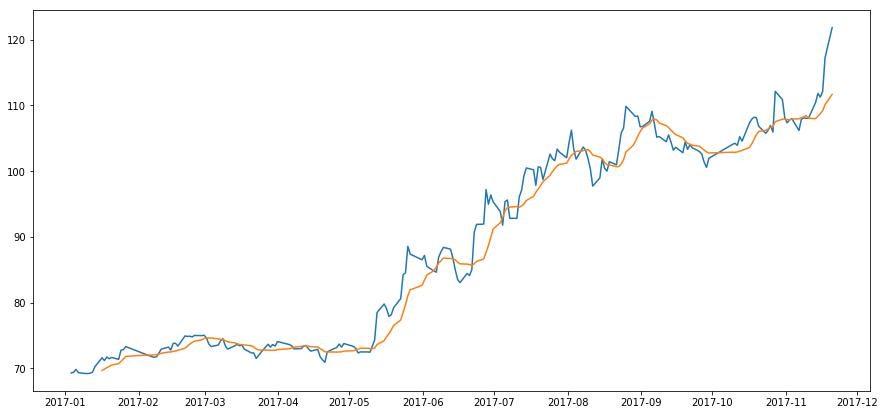

In [69]:
%matplotlib inline
plt.figure(figsize=(15,7))
plt.plot(df.close)
plt.plot(Series)
plt.show()

# 第四题

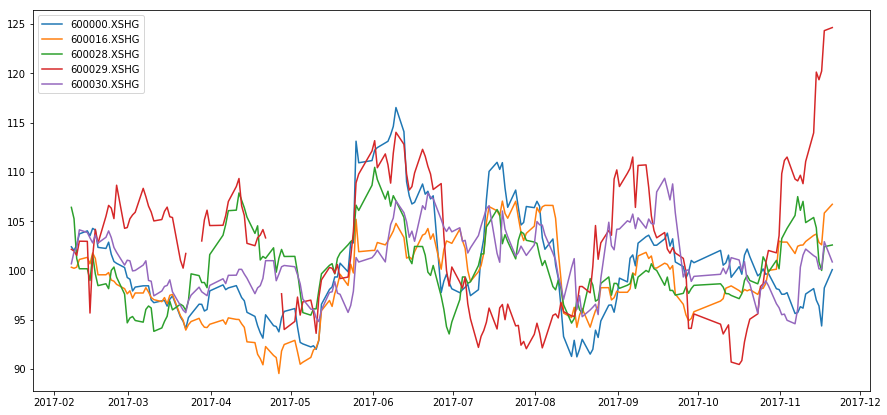

In [95]:
# real = ROCR100(close, timeperiod=10)
plt.figure(figsize=(15,7))
label = list(orderedDict.keys())
for k in label[0:5]:
    try:
        close = PN[k].close
        ROCR100 = ta.ROCR100(close, timeperiod=20)
    except:
        pass
    finally:
        plt.plot(ROCR100)
plt.legend(label[0:5])
plt.show()